In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:

df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Univariate Analysis

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


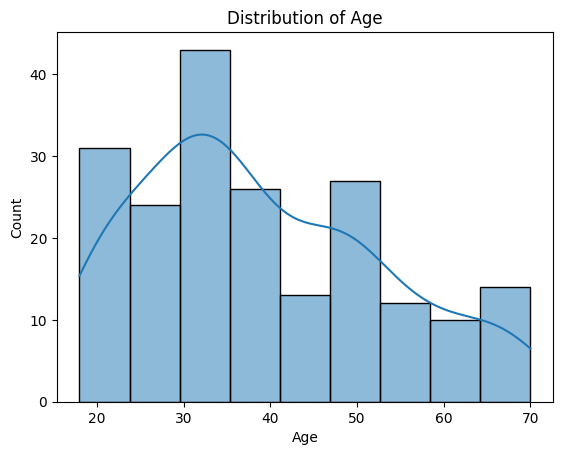

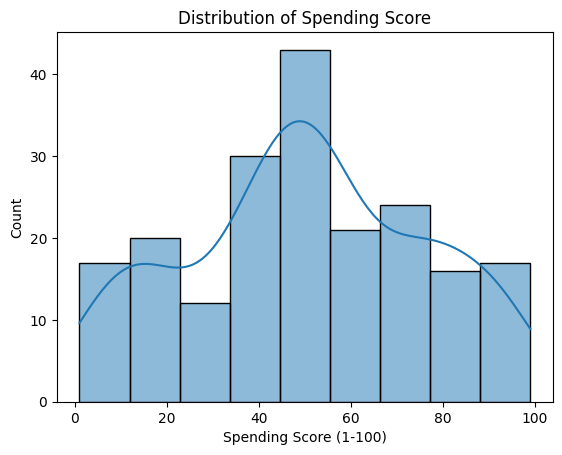

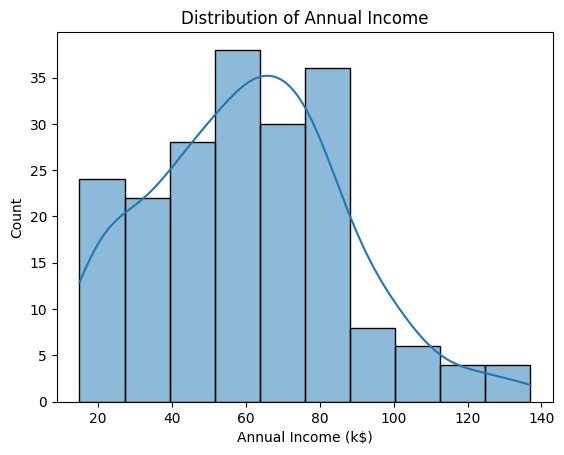

In [6]:

# Distribution of Age
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Distribution of Spending Score
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.show()

# Distribution of Annual Income
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.show()


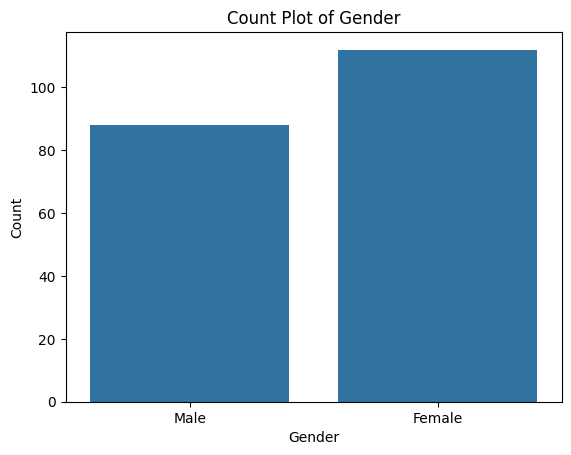

In [7]:


# Count plot for Gender
sns.countplot(x='Gender', data=df)
plt.title('Count Plot of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
columns = ['CustomerID', 'Gender',  'Annual Income (k$)',
       'Spending Score (1-100)']

<ipython-input-10-de2011175df9>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_melted[df_melted['variable']==i], x='value', shade=True, hue='Gender')


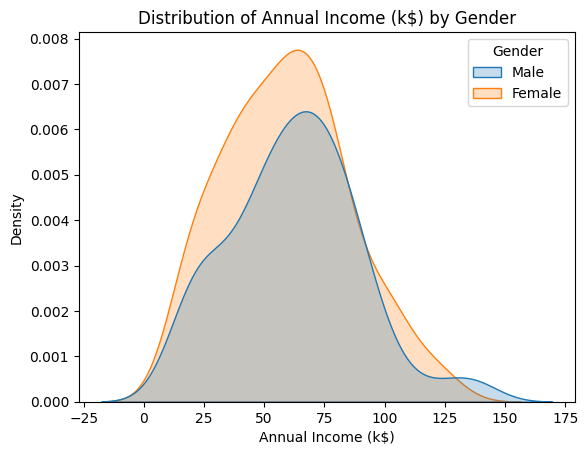

<ipython-input-10-de2011175df9>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_melted[df_melted['variable']==i], x='value', shade=True, hue='Gender')


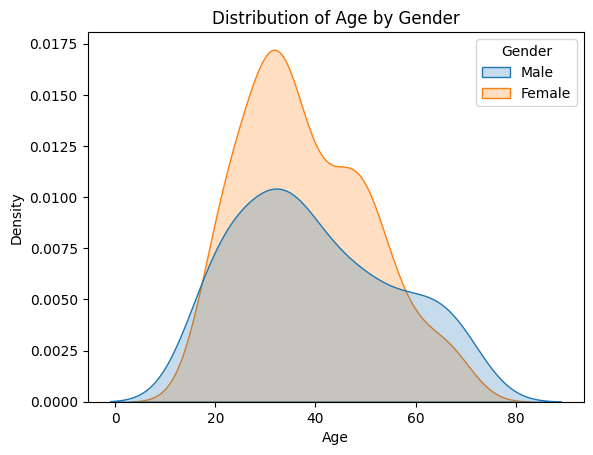

<ipython-input-10-de2011175df9>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_melted[df_melted['variable']==i], x='value', shade=True, hue='Gender')


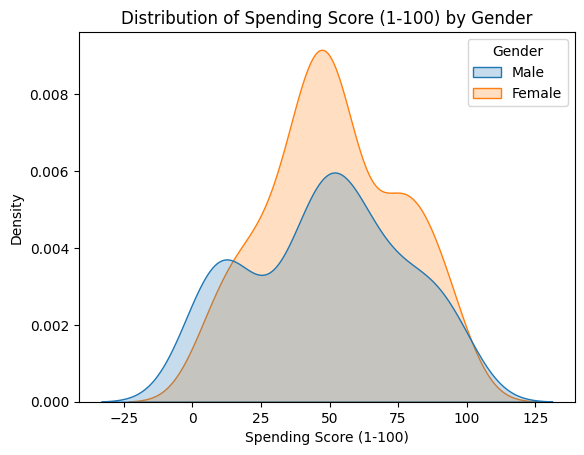

In [10]:

df_melted = pd.melt(df, id_vars=['CustomerID', 'Gender'], value_vars=['Annual Income (k$)','Age', 'Spending Score (1-100)'])

for i in df_melted['variable'].unique():
    plt.figure()
    sns.kdeplot(data=df_melted[df_melted['variable']==i], x='value', shade=True, hue='Gender')
    plt.title(f"Distribution of {i} by Gender")  # Updated title
    plt.xlabel(i)  # Set x-axis label to the variable name
    plt.show()

<ipython-input-11-f9b88a1315d4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Age', data=df, palette={'Male': 'blue', 'Female': 'pink'})
<ipython-input-11-f9b88a1315d4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Annual Income (k$)', data=df, palette={'Male': 'blue', 'Female': 'pink'})
<ipython-input-11-f9b88a1315d4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette={'Male': 'blue', 'Female': 'pink'})


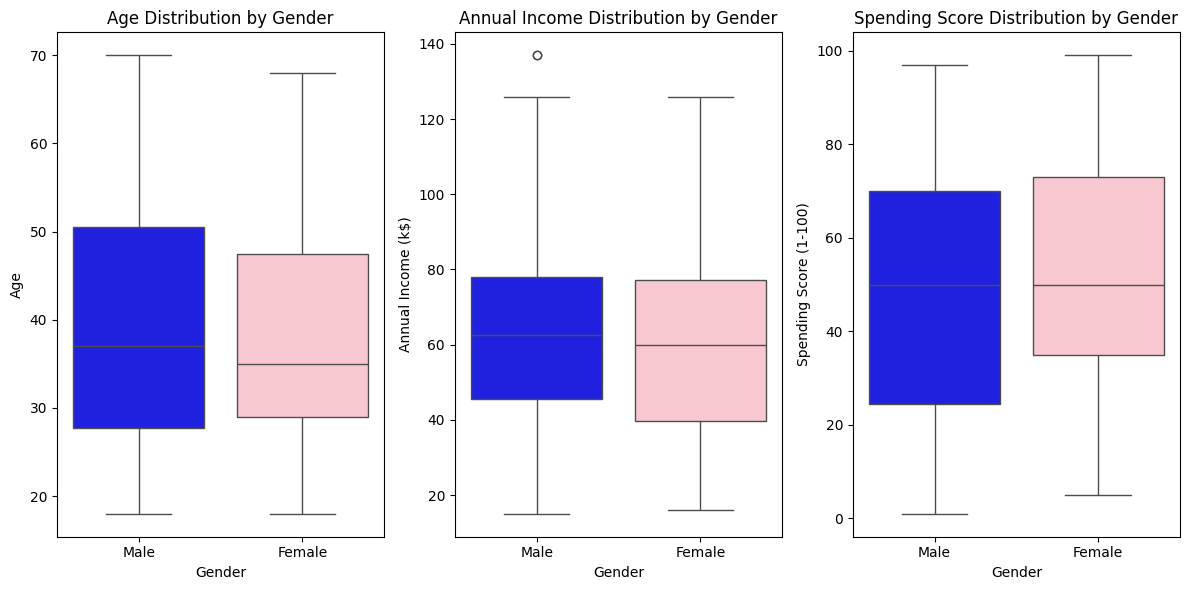

In [11]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='Gender', y='Age', data=df, palette={'Male': 'blue', 'Female': 'pink'})
plt.title('Age Distribution by Gender')

plt.subplot(1, 3, 2)
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df, palette={'Male': 'blue', 'Female': 'pink'})
plt.title('Annual Income Distribution by Gender')

plt.subplot(1, 3, 3)
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette={'Male': 'blue', 'Female': 'pink'})
plt.title('Spending Score Distribution by Gender')

plt.tight_layout()
plt.show()


In [12]:
df['Gender'].value_counts()

,count
Gender,
Female,112
Male,88


In [13]:
# get percentage
df['Gender'].value_counts(normalize=True)

,proportion
Gender,
Female,0.56
Male,0.44


### Bivariate Analysis

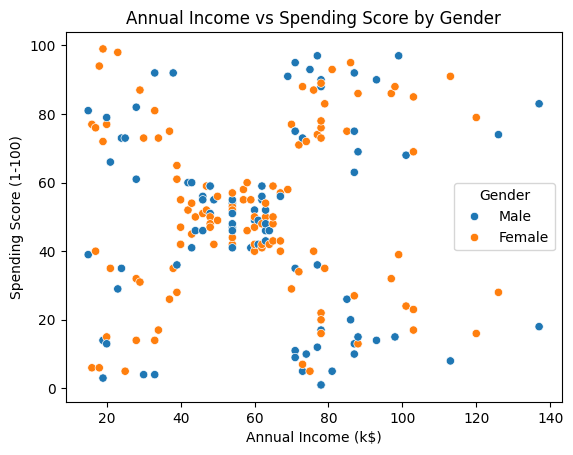

In [14]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title('Annual Income vs Spending Score by Gender')
plt.show()

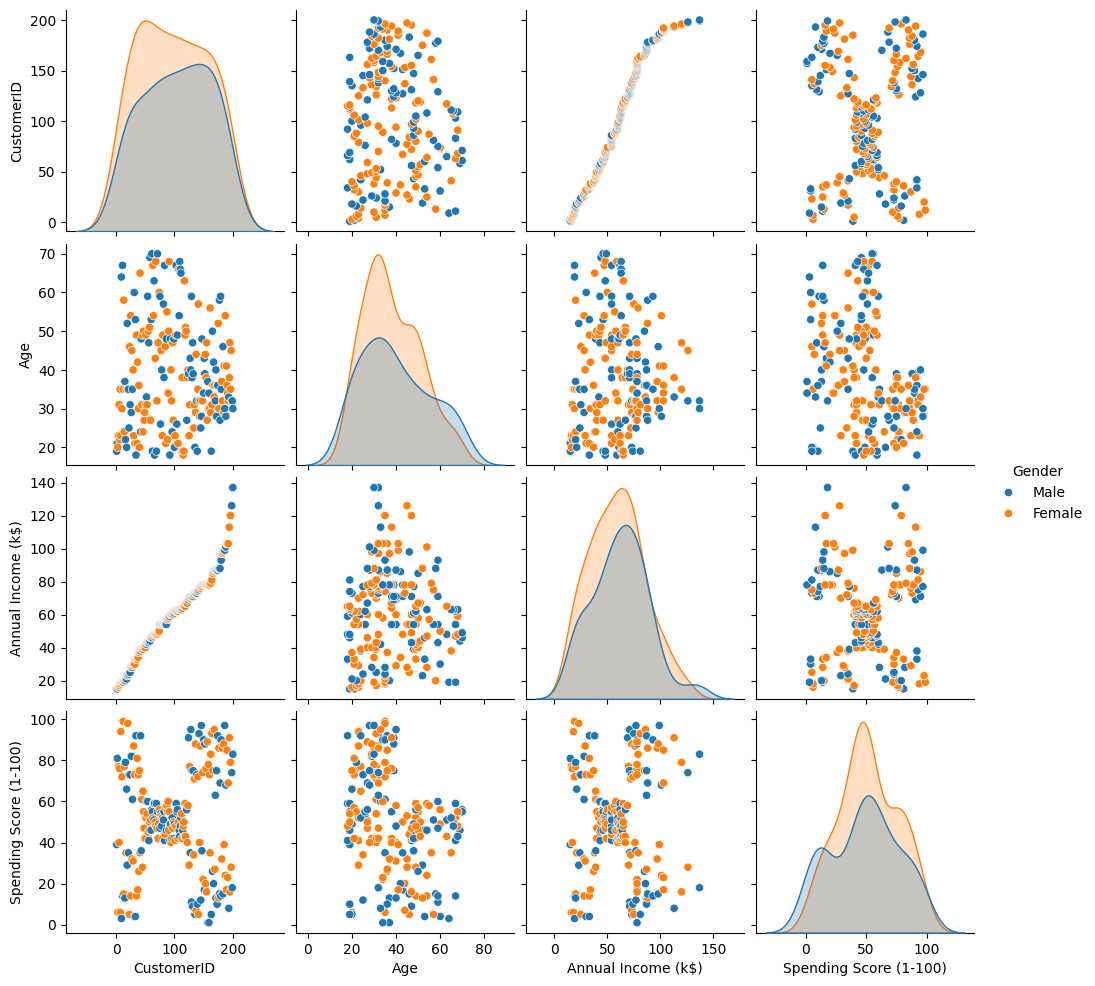

In [15]:
sns.pairplot(df, hue='Gender')
plt.show()


In [16]:
# drop customerId
df.drop('CustomerID', axis=1, inplace=True)

*Insights**

Age Distribution:

The age distribution shows that the majority of customers fall within a certain age range, with some variation between genders.
There is no strong correlation between age and other variables like annual income or spending score, as shown by the scattered points.

Annual Income Distribution:

The distribution of annual income shows a concentration around a certain income level for both genders, similar to the previous plot.

Both genders have similar income distributions, with a slight difference in the density at certain income levels.

Spending Score Distribution:

The spending score shows a bimodal distribution, meaning there are two distinct groups of customers in terms of their spending behavior.

The gender distribution within spending scores is relatively even, although there are subtle differences in density, particularly in the higher spending score range.

Clusters:

The most noticeable clustering occurs when considering Annual Income and Spending Score, forming four main clusters. This insight could be valuable for customer segmentation, where each cluster might represent a different type of customer that could be targeted with tailored marketing strategies.

In [17]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


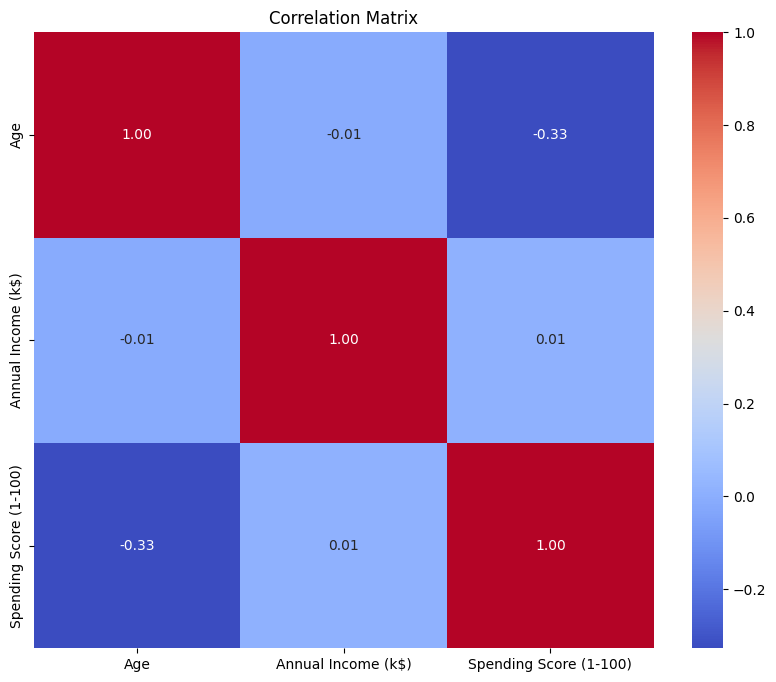

In [18]:
# Calculate the correlation matrix for numerical columns only
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


### Clustering

**Univariate, Bivariate, Multivariate**

In [19]:
clustering1 = KMeans()

In [20]:


# Extract the 'Annual Income (k$)' column for clustering
X = df[['Annual Income (k$)']]

# Fit the KMeans model to the data
clustering1.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans()

In [21]:
clustering1.labels_

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [22]:
df['Annual Income Cluster'] = clustering1.labels_
df.head(50)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Income Cluster
0,Male,19,15,39,5
1,Male,21,15,81,5
2,Female,20,16,6,5
3,Female,23,16,77,5
4,Female,31,17,40,5
5,Female,22,17,76,5
6,Female,35,18,6,5
7,Female,23,18,94,5
8,Male,64,19,3,5
9,Female,30,19,72,5


In [23]:
df['Annual Income Cluster'].value_counts()

,count
Annual Income Cluster,
4,40
7,36
0,32
2,30
5,24
1,18
6,14
3,6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

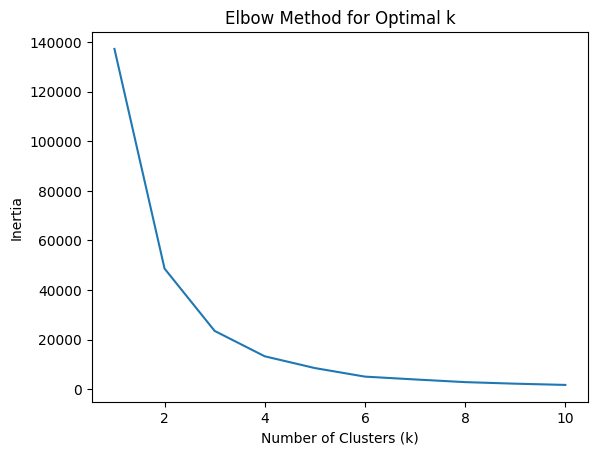

In [24]:
# using elbow method to find out how many clusters needed

inertia_scores = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df[['Annual Income (k$)']])
  inertia_scores.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_scores)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [25]:
clustering1.inertia_

2921.5666666666666

In [26]:
#making   clustering1 4 clusters

clustering1 = KMeans(n_clusters=4)

# Extract the 'Annual Income (k$)' column for clustering
X = df[['Annual Income (k$)']]

# Fit the KMeans model to the data
clustering1.fit(X)

clustering1.labels_
df['Annual Income Cluster'] = clustering1.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [27]:
clustering1.inertia_

13278.112713472474

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

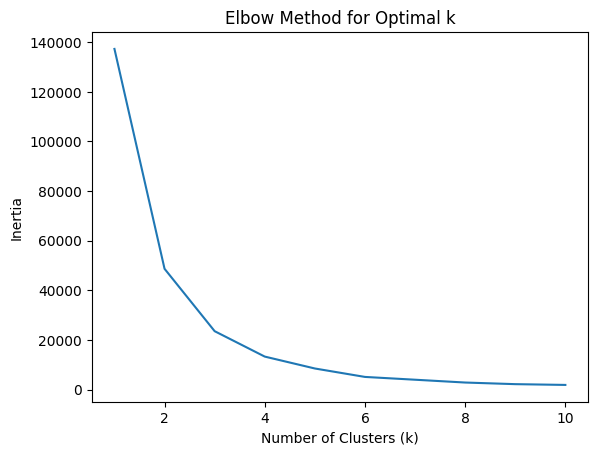

In [28]:
intertia_scores = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df[['Annual Income (k$)']])
  kmeans.inertia_
  intertia_scores.append(kmeans.inertia_)

plt.plot(range(1, 11), intertia_scores)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [32]:
df.groupby(['Annual Income Cluster'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Annual Income Cluster,,,
0,36.838710,77.806452,50.403226
1,43.970588,54.764706,50.014706
2,35.280000,27.400000,49.480000
3,36.600000,109.700000,52.000000


from matplotlib import pyplot as plt
_df_0['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Annual Income (k$)'].plot(kind='hist', bins=20, title='Annual Income (k$)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Spending Score (1-100)'].plot(kind='hist', bins=20, title='Spending Score (1-100)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Age', y='Annual Income (k$)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Annual Income (k$)', y='Spending Score (1-100)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Annual Income (k$)'].plot(kind='line', figsize=(8, 4), title='Annual Income (k$)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Spending Score (1-100)'].plot(kind='line', figsize=(8, 4), title='Spending Score (1-100)')
plt.gca().spines[['top', 'right']].set_visible(False)

### Bivariate Clustering

In [45]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [46]:
clustering2.labels_
df['Annual Income and Spending Score Cluster'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Income Cluster,Annual Income and Spending Score Cluster
0,Male,19,15,39,2,3
1,Male,21,15,81,2,1
2,Female,20,16,6,2,3
3,Female,23,16,77,2,1
4,Female,31,17,40,2,3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

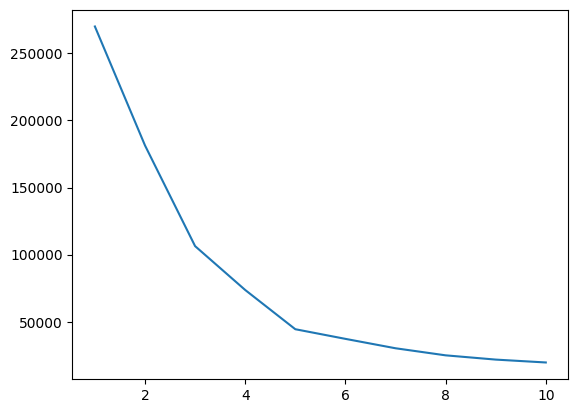

In [38]:
intertia_scores2 = []
for i in range(1, 11):
  kmeans2= KMeans(n_clusters=i)
  kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

  intertia_scores2.append(kmeans2.inertia_) # Append inertia for kmeans2, not kmeans
plt.plot(range(1, 11), intertia_scores2)

In [39]:
# using clustering of 5
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

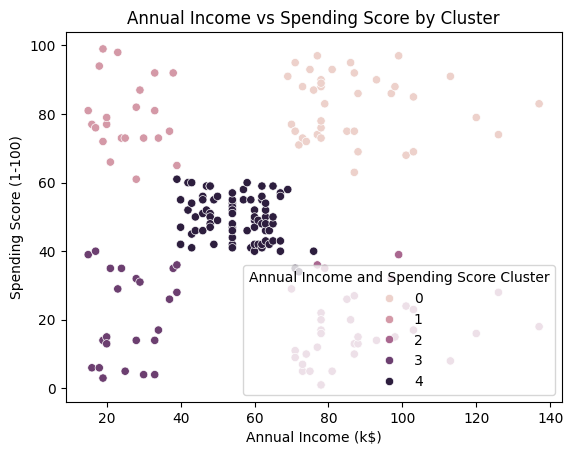

In [49]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Annual Income and Spending Score Cluster')
plt.title('Annual Income vs Spending Score by Cluster')
plt.show()

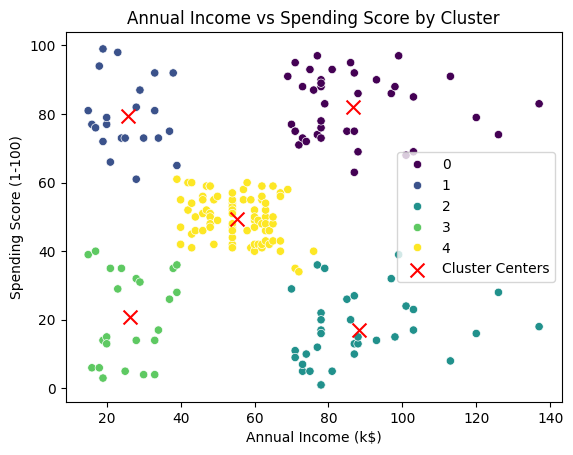

In [48]:
# same chart but with center marker

# Calculate cluster centers
centers = clustering2.cluster_centers_

# Plot the scatter plot with cluster assignments
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Annual Income and Spending Score Cluster', palette='viridis')
plt.title('Annual Income vs Spending Score by Cluster')

# Plot cluster centers as 'X' markers
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=100, c='red', label='Cluster Centers')

plt.legend()
plt.show()


**Cluster Characteristics:**


```
# This is formatted as code
```


Top left: Represents individuals with lower annual income but higher spending scores.

Bottom left: Represents individuals with lower annual income and lower spending scores.

Middle: Represents a mix of individuals with moderate income and various spending scores.

Right side: Individuals with higher annual income are grouped separately based on their spending scores.

**Looking at Gender by cluster**

In [88]:
pd.crosstab(df['Annual Income and Spending Score Cluster'], df['Gender'],normalize='index')

Gender,Female,Male
Annual Income and Spending Score Cluster,,
0,0.538462,0.461538
1,0.590909,0.409091
2,0.457143,0.542857
3,0.608696,0.391304
4,0.592593,0.407407


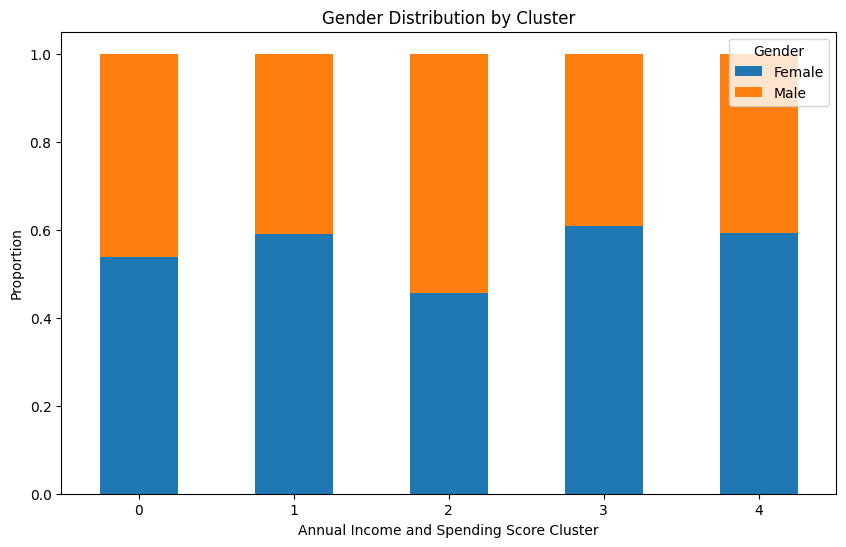

In [89]:
# prompt: chart this
# Gender	Female	Male
# Annual Income and Spending Score Cluster
# 0	0.538462	0.461538
# 1	0.590909	0.409091
# 2	0.457143	0.542857
# 3	0.608696	0.391304
# 4	0.592593	0.407407

# Create a cross-tabulation
gender_by_cluster = pd.crosstab(df['Annual Income and Spending Score Cluster'], df['Gender'], normalize='index')

# Plot the chart
gender_by_cluster.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Gender Distribution by Cluster')
plt.xlabel('Annual Income and Spending Score Cluster')
plt.ylabel('Proportion')
plt.legend(title='Gender')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()



**Cluster Summary**

Clusters 1, 3, and 4 have a higher proportion of females compared to males, with over 59% representation in each.

Cluster 2 is the only cluster where males outnumber females, with 54.3% of the cluster being male.
**bold text**
Cluster 0 shows a more balanced gender distribution, with a slight majority of females.

In [92]:
df.groupby(['Annual Income and Spending Score Cluster'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Annual Income and Spending Score Cluster,,,
0,32.692308,86.538462,82.128205
1,25.272727,25.727273,79.363636
2,41.114286,88.200000,17.114286
3,45.217391,26.304348,20.913043
4,42.716049,55.296296,49.518519


**Summary of Clusters**


Cluster 0: Young High Earners, High Spenders

Profile: Younger customers (average age 33) with high incomes ($86.5k) and very high spending habits (~82).
Strategy: Focus on premium products, exclusive deals, and luxury experiences. Introduce loyalty programs and premium memberships targeting this segment.
Cluster 1: Young Low Earners, High Spenders

Profile: Young customers (average age 25) with lower incomes ($25.7k) but high spending habits (~79).
Strategy: Offer affordable luxury, installment payment options, and promotions focused on value-for-money products.
Cluster 2: Older High Earners, Low Spenders

Profile: Older customers (average age 41) with high incomes ($88.2k) but low spending habits (~17).
Strategy: Emphasize high-quality, durable goods, and communicate long-term value. Use personalized marketing that highlights savings and long-term benefits.
Cluster 3: Older Low Earners, Low Spenders

Profile: Older customers (average age 45) with low incomes ($26.3k) and low spending habits (~21).
Strategy: Focus on budget-friendly products and promotions. Introduce loyalty programs offering discounts and rewards for frequent purchases.
Cluster 4: Middle-aged Moderate Earners, Average Spenders

Profile: Middle-aged customers (average age 43) with moderate incomes ($55.3k) and average spending habits (~50).
Strategy: Offer a balanced product range with mid-range and occasional luxury items. Explore bundling products and family-oriented deals.

**Overall Recommendations:**

Personalized Marketing:

 Tailor strategies to the unique needs of each cluster.

Product Range Diversification:

Ensure a mix of luxury and budget-friendly products.

Loyalty Programs: Create segment-specific loyalty initiatives.

Payment Flexibility:

Offer options like installment payments to cater to different financial capacities.



### Multivariate clustering

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()

In [53]:
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Income Cluster,Annual Income and Spending Score Cluster
0,Male,19,15,39,2,3
1,Male,21,15,81,2,1
2,Female,20,16,6,2,3
3,Female,23,16,77,2,1
4,Female,31,17,40,2,3


In [56]:
# prompt: use binanny encoding for gender
dff =pd.get_dummies(df) # Change 'Gender_male' to 'Gender' if that's the correct column name
dff.head()



,Age,Annual Income (k$),Spending Score (1-100),Annual Income Cluster,Annual Income and Spending Score Cluster,Gender_Female,Gender_Male
0,19,15,39,2,3,False,True
1,21,15,81,2,1,False,True
2,20,16,6,2,3,True,False
3,23,16,77,2,1,True,False
4,31,17,40,2,3,True,False


In [60]:
# prompt: make gender 0/1 with dummies

df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df.head()


,Age,Annual Income (k$),Spending Score (1-100),Annual Income Cluster,Annual Income and Spending Score Cluster,Gender_Male
0,19,15,39,2,3,True
1,21,15,81,2,1,True
2,20,16,6,2,3,False
3,23,16,77,2,1,False
4,31,17,40,2,3,False


In [61]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Annual Income Cluster', 'Annual Income and Spending Score Cluster',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [63]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]

In [64]:
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [66]:
dff = pd.DataFrame(scaler.fit_transform(dff))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

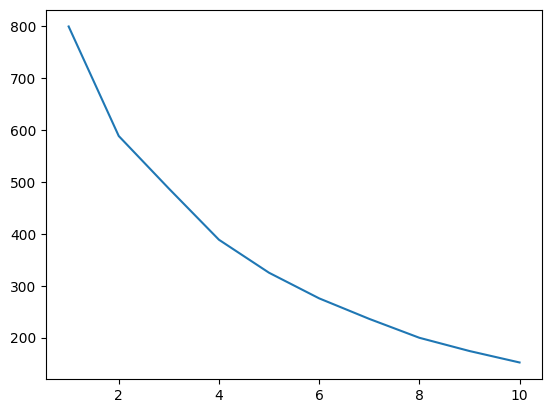

In [67]:
inertia_scores3 = []
for i in range(1, 11):
  kmeans3 = KMeans(n_clusters=i)
  kmeans3.fit(dff)
  inertia_scores3.append(kmeans3.inertia_)

plt.plot(range(1, 11), inertia_scores3)

**Insights**
the clusting shoud be 4 or 5

In [85]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Annual Income Cluster,Annual Income and Spending Score Cluster,Gender_Male
0,19,15,39,2,3,True
1,21,15,81,2,1,True
2,20,16,6,2,3,False
3,23,16,77,2,1,False
4,31,17,40,2,3,False


In [86]:
# change gender_male back Gender and orginal values

df['Gender'] = df['Gender_Male'].apply(lambda x: 'Male' if x == 1 else 'Female')
df.drop('Gender_Male', axis=1, inplace=True)
df.head()


,Age,Annual Income (k$),Spending Score (1-100),Annual Income Cluster,Annual Income and Spending Score Cluster,Gender
0,19,15,39,2,3,Male
1,21,15,81,2,1,Male
2,20,16,6,2,3,Female
3,23,16,77,2,1,Female
4,31,17,40,2,3,Female


In [87]:
df.to_csv('clustered_data.csv')